In [ ]:
fromfromfromfrom google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import The Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sn
import copy
import math
plt.style.use('Solarize_Light2')

#Data Set Analysis

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/property_listing_data_in_Bangladesh.csv')
df.head()

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand


In [ ]:
df.shape

(7557, 11)

In [ ]:
df.describe()

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
count,7557,7557,7557,7557,7557,7557,7557,7556,7557,7557,7557
unique,7497,13,9,478,677,3,1,1447,7557,679,157
top,1200 Square Feet Apartment For Rent In Adabor,3,3,"1,200 sqft","Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"March 6, 2020",15 Thousand
freq,3,4386,3049,537,248,7489,7557,440,1,246,642


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7557 non-null   object
 1   beds         7557 non-null   object
 2   bath         7557 non-null   object
 3   area         7557 non-null   object
 4   adress       7557 non-null   object
 5   type         7557 non-null   object
 6   purpose      7557 non-null   object
 7   flooPlan     7556 non-null   object
 8   url          7557 non-null   object
 9   lastUpdated  7557 non-null   object
 10  price        7557 non-null   object
dtypes: object(11)
memory usage: 649.6+ KB


In [ ]:
df.isnull().sum()

title          0
beds           0
bath           0
area           0
adress         0
type           0
purpose        0
flooPlan       1
url            0
lastUpdated    0
price          0
dtype: int64

In [ ]:
rows_with_nan = df[df.isna().any(axis=1)]
rows_with_nan

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
4196,In Senpara Parbata this apartment is up for re...,3,3,"1,300 sqft","Section 10, Mirpur, Dhaka",Apartment,For Rent,NaN,https://www.bproperty.com/en/property/details-...,"June 21, 2022",21 Thousand


#Data Set Preprocessing

In [ ]:
print(df[df['type'] == 'Duplex'].shape[0])

47


In [ ]:
print(df[df['type'] == 'Building'].shape[0])

21


In [ ]:
df = df[~df['type'].isin(['Duplex', 'Building'])]
df.shape

(7489, 11)

In [ ]:
y = df['price']
X = df.drop(columns = ['price', 'title', 'adress', 'type', 'purpose',
'flooPlan', 'url', 'lastUpdated'], axis=1)
print(y.shape)
print(X.shape)

(7489,)
(7489, 3)


In [ ]:
X.head()

,beds,bath,area
0,3,4,"2,200 sqft"
1,3,4,"1,400 sqft"
2,3,4,"1,950 sqft"
3,3,3,"2,000 sqft"
4,3,4,"1,650 sqft"


In [ ]:
y

0       50 Thousand
1       30 Thousand
2       30 Thousand
3       35 Thousand
4       25 Thousand
           ...     
7551    50 Thousand
7553    19 Thousand
7554    22 Thousand
7555      1.75 Lakh
7556    90 Thousand
Name: price, Length: 7489, dtype: object

In [ ]:
X['beds'].unique()

array(['3 ', '5 ', '4 ', '1 Bed', '2 ', '6 '], dtype=object)

In [ ]:
X['bath'].unique()

array(['4 ', '3 ', '5 ', '2 ', '1 Bath', '6 '], dtype=object)

In [ ]:
X = np.asarray(X)
print(X)
y = np.asarray(y)
print(y)

[['3 ' '4 ' '2,200 sqft']
 ['3 ' '4 ' '1,400 sqft']
 ['3 ' '4 ' '1,950 sqft']
 ...
 ['2 ' '2 ' '1,000 sqft']
 ['3 ' '4 ' '3,600 sqft']
 ['4 ' '4 ' '2,600 sqft']]
['50 Thousand' '30 Thousand' '30 Thousand' ... '22 Thousand' '1.75 Lakh'
 '90 Thousand']


In [ ]:
type(y[0])

str

In [ ]:
print(type(X[0][0]))
print(type(X[0][1]))
print(type(X[0][2]))

<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
unique_suffix = set()
m = len(y)
for i in range(m):
    split_strings = y[i].split()
    unique_suffix.add(split_strings[1])

print(unique_suffix)

for i in range(m):
    split_strings = y[i].split()
    if split_strings[1] == 'Thousand':
        revised_price = float(split_strings[0]) * 1000
        revised_price = int(revised_price)
    else:
        revised_price = float(split_strings[0]) * 100000
        revised_price = int(revised_price)
    y[i] = revised_price
print(y)

{'Thousand', 'Lakh'}
[50000 30000 30000 ... 22000 175000 90000]


In [ ]:
for i in range(X.shape[0]) :
  split_strings = X[i][2].split()
  num = ""
  for digit in split_strings[0] :
    if(digit != ',') :
      num += digit
  X[i][2] = num
X

array([['3 ', '4 ', '2200'],
       ['3 ', '4 ', '1400'],
       ['3 ', '4 ', '1950'],
       ...,
       ['2 ', '2 ', '1000'],
       ['3 ', '4 ', '3600'],
       ['4 ', '4 ', '2600']], dtype=object)

In [ ]:
for i in range(len(X)):
  if X[i][1] == '1 Bath' :
    X[i][1] = '1'

for i in range(len(X)):
  if X[i][0] == '1 Bed' :
    X[i][0] = '1'

In [ ]:
X.shape

(7489, 3)

In [ ]:
X = X.astype(float)
X[0:100, 0]

array([3., 3., 3., 3., 3., 5., 3., 3., 3., 3., 3., 3., 4., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 4., 3., 4., 1., 3., 2., 3., 4., 3.,
       4., 3., 1., 3., 3., 1., 3., 4., 3., 4., 3., 4., 4., 3., 3., 4., 4.,
       2., 3., 3., 3., 2., 2., 2., 3., 3., 3., 3., 2., 4., 3., 3., 3., 3.,
       3., 4., 4., 3., 4., 4., 3., 3., 3., 4., 5., 3., 2., 3., 3., 3., 3.,
       3., 3., 4., 3., 3., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.])

#Data Set Visualization

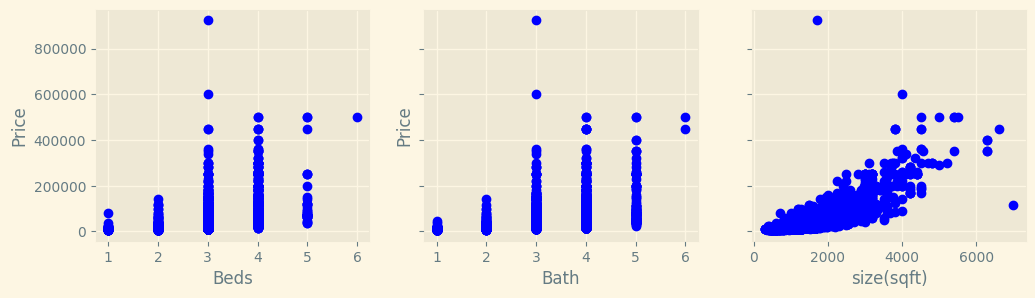

In [ ]:
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X[:,i],y, color = 'blue')
    if i == 0 :
      ax[i].set_xlabel('Beds')
    elif i == 1 :
      ax[i].set_xlabel('Bath')
    else :
      ax[i].set_xlabel('size(sqft)')

ax[0].set_ylabel("Price")
ax[1].set_ylabel("Price")
ax[1].set_ylabel("Price")
plt.show()

Text(0, 0.5, 'Count')

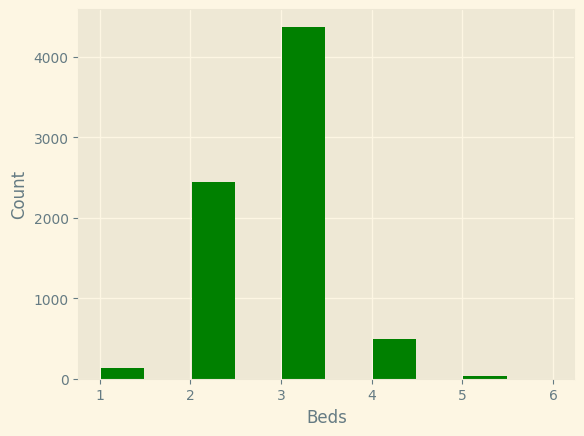

In [ ]:
plt.hist(X[:, 0], color = 'green', rwidth = 0.95)
plt.xlabel("Beds")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

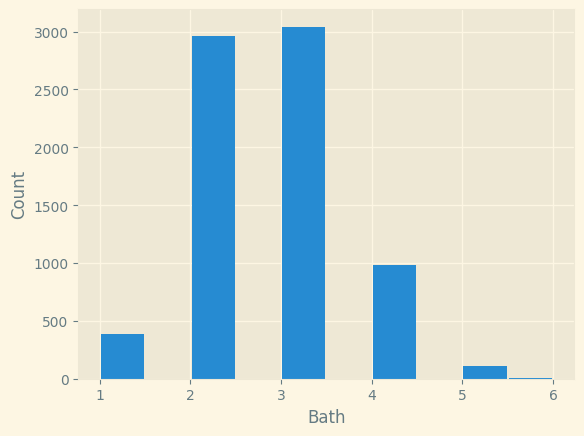

In [ ]:
plt.hist(X[:, 1], rwidth = 0.95, label = 'Bath')
plt.xlabel("Bath")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

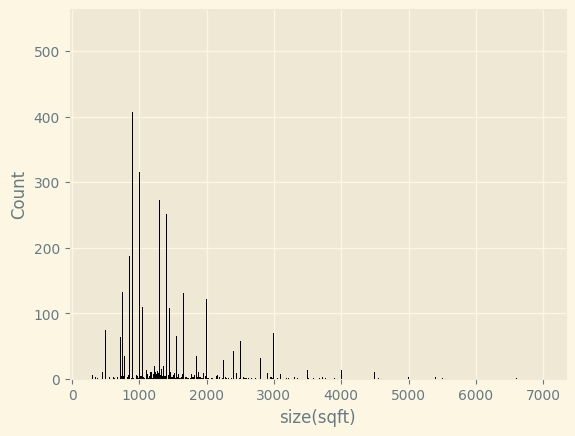

In [ ]:
plt.hist(X[:, 2], bins = 1000, color = 'black')
plt.xlabel("size(sqft)")
plt.ylabel("Count")
# plt.xlim(0, 100000)

#Normalization of The Data Sets

In [ ]:
def zscore_normalize_features(X):
  mu     = np.mean(X, axis=0)
  sigma  = np.std(X, axis=0)
  # print(mu)
  # print(sigma)
  X_mean = (X - mu)
  X_norm = (X - mu) / sigma
  return (X_norm, X_mean)

In [ ]:
X_norm, X_mean = zscore_normalize_features(X)
y_norm, y_mean = zscore_normalize_features(y)
print(X_norm)
print(y_norm)

[[ 0.44810679  1.61508589  1.34838615]
 [ 0.44810679  1.61508589  0.11556504]
 [ 0.44810679  1.61508589  0.96312956]
 ...
 [-1.12520393 -0.80326425 -0.50084551]
 [ 0.44810679  1.61508589  3.50582309]
 [ 2.02141751  1.61508589  1.9647967 ]]
[0.4414447408176724 -0.02407863892250416 -0.02407863892250416 ...
 -0.21028799081857477 3.350965864193775 1.3724915002980256]


#Train-Test-Split

In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X_norm, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)
print(X_train)
print(y_train)

[[ 0.44810679 -0.80326425 -0.57789683]
 [-1.12520393 -0.80326425 -0.80905079]
 [ 0.44810679  0.40591082 -0.19264023]
 ...
 [ 0.44810679  0.40591082 -0.03853759]
 [ 0.44810679  0.40591082  0.65492428]
 [ 0.44810679  0.40591082  0.36212927]]
[10000 12000 20000 ... 26000 35000 50000]


In [ ]:
print(X_test)
print(y_test)

[[ 0.44810679 -0.80326425 -0.40067879]
 [ 0.44810679  0.40591082  0.03851372]
 [ 0.44810679  0.40591082  0.20494457]
 ...
 [-1.12520393 -0.80326425 -0.65494815]
 [ 0.44810679 -0.80326425 -0.80905079]
 [ 2.02141751  0.40591082  0.03851372]]
[16000 15500 30000 ... 10000 15000 25000]


#Gradient Descent Scratch

In [ ]:
def compute_cost(X, y, w, b):
  m = X.shape[0]
  cost = 0.0
  for i in range(m):
      f_wb_i = np.dot(X[i], w) + b
      cost = cost + (f_wb_i - y[i])**2
  cost = cost / (2 * m)
  return cost

In [ ]:
def compute_gradient(X, y, w, b):
  m,n = X.shape
  d1 = np.zeros((n,))
  d2 = 0.
  for i in range(m):
      gap = (np.dot(X[i], w) + b) - y[i]
      for j in range(n):
          d1[j] = d1[j] + gap * X[i, j]
      d2 = d2 + gap
  d1 = d1 / m
  d2 = d2 / m

  return d2, d1

In [ ]:
def gradient_descent(X_train, y_train, X_val, y_val, w_in, b_in, LR, iteration):

    J_train = []
    J_validation = []
    w = w_in
    b = b_in

    for i in range(iteration):

        d2,d1 = compute_gradient(X_train, y_train, w, b)

        w = w - LR * d1
        b = b - LR * d2

        J_train.append(compute_cost(X_train, y_train, w, b))
        J_validation.append(compute_cost(X_val, y_val, w, b))

        print(f"Iteration {i:4d}: Training Cost {J_train[-1]:8.2f} Validation Cost {J_validation[-1]:8.2f} ")

    return w, b, J_train

#Train the Model With Gradient Descent

In [ ]:
initial_w = np.zeros((3))
initial_w = initial_w.astype(float)
initial_b = 0.
w_norm, b_norm, hist = gradient_descent(X_train, y_train, X_val, y_val, initial_w, initial_b, 0.5, 200)

Iteration    0: Training Cost 657437704.12 Validation Cost 660165110.82 
Iteration    1: Training Cost 494504752.53 Validation Cost 514188257.57 
Iteration    2: Training Cost 430844569.53 Validation Cost 442938769.25 
Iteration    3: Training Cost 395574165.69 Validation Cost 405499439.67 
Iteration    4: Training Cost 372180674.29 Validation Cost 379294150.28 
Iteration    5: Training Cost 355442548.92 Validation Cost 360312398.73 
Iteration    6: Training Cost 343123143.03 Validation Cost 346021769.02 
Iteration    7: Training Cost 333963165.03 Validation Cost 335181891.44 
Iteration    8: Training Cost 327126014.56 Validation Cost 326904645.87 
Iteration    9: Training Cost 322013806.22 Validation Cost 320560048.01 
Iteration   10: Training Cost 318187353.93 Validation Cost 315677564.16 
Iteration   11: Training Cost 315320855.89 Validation Cost 311905261.95 
Iteration   12: Training Cost 313171742.08 Validation Cost 308978219.14 
Iteration   13: Training Cost 311559133.67 Validati

In [ ]:
print(f"b,w found by gradient descent: {b_norm:0.2f},  {w_norm}\n\n")
m, n = X_test.shape

y_pred_test = []
test_cost = []

for i in range(m):
    predicted_val = np.dot(X_test[i], w_norm) + b_norm
    y_pred_test.append(predicted_val)

for i in range(m):
    print(f"prediction: {y_pred_test[i]:0.2f}, target value: {y_test[i]}")

print()

Cost = compute_cost(X_test, y_test, w_norm, b_norm)
print(f"Test cost computed : {Cost}\n\n")

r2 = r2_score(y_test, y_pred_test)
print(f"Test R-squared Score: {r2}\n\n")

print(f"b,w found by gradient descent: {b_norm:0.2f},  {w_norm}\n\n")


b,w found by gradient descent: 31100.51,  [ -7140.91777041 -10257.07872141  46705.8992817 ]


prediction: 17425.70, target value: 16000
prediction: 25535.97, target value: 15500
prediction: 33309.28, target value: 30000
prediction: 3829.20, target value: 15500
prediction: 9587.20, target value: 16000
prediction: 16784.70, target value: 20000
prediction: 99064.77, target value: 100000
prediction: 47416.38, target value: 15000
prediction: 7594.80, target value: 10500
prediction: 22104.07, target value: 13500
prediction: 6132.40, target value: 12000
prediction: -1209.06, target value: 11000
prediction: 45522.13, target value: 55000
prediction: -14050.29, target value: 12000
prediction: 19944.82, target value: 27000
prediction: 23982.20, target value: 15000
prediction: 17425.70, target value: 15000
prediction: 7542.22, target value: 18000
prediction: 74312.14, target value: 40000
prediction: 45522.13, target value: 45000
prediction: 13185.95, target value: 13000
prediction: 63077.26, targe

In [ ]:
sample = [4, 3, 1700] # price = 100000
sample_norm, sample_mean = zscore_normalize_features(sample)
predicted_val = np.dot(sample_norm, w_norm) + b_norm
print(predicted_val)

109456.80485578995


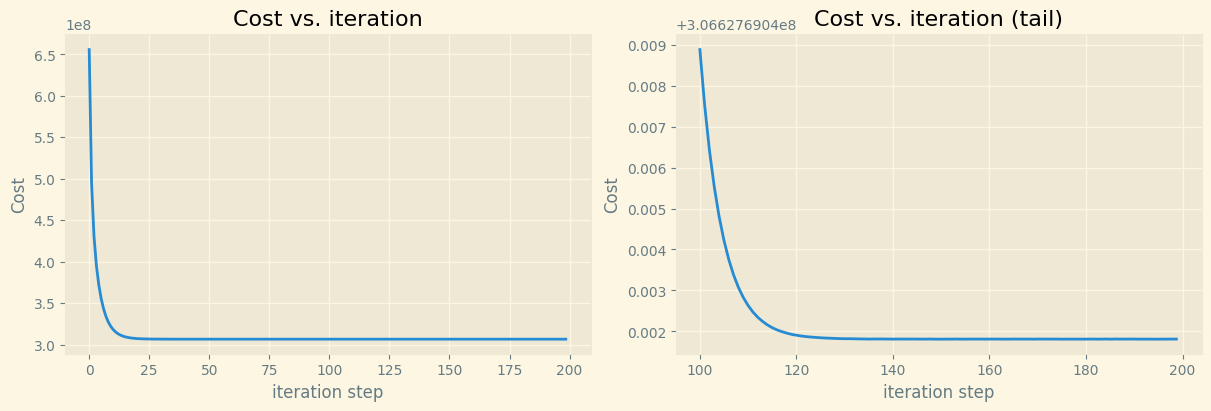

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(hist)
ax2.plot(100 + np.arange(len(hist[100:])), hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

#Error Checking Using SciKit Learn

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

# y_pred_train = model.predict(X_train)

# mse = mean_squared_error(y_train, y_pred_train)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_train, y_pred_train)
# r2 = r2_score(y_train, y_pred_train)

# print("Mean Squared Error:", mse)
# print("Root Mean Squared Error:", rmse)
# print("Mean Absolute Error:", mae)
# print("R-squared Score:", r2)

Mean Squared Error: 483312539.7450933
Root Mean Squared Error: 21984.370351344915
Mean Absolute Error: 12652.132016756397
R-squared Score: 0.7083114076606765
